In [99]:
from sklearn.metrics import confusion_matrix, silhouette_score, calinski_harabasz_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense, Lambda
from sklearn.ensemble import IsolationForest
from keras.models import Sequential, Model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import OneClassSVM
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras import backend as K
from pandas import DataFrame
import seaborn as sb
import pandas as pd
import numpy as np
import sklearn
import random
import time

import warnings
warnings.filterwarnings("ignore")

In [100]:
# loading the dataset
pd.options.display.max_columns = None
data = pd.read_csv('Deloitte ML Challenge Predict Loan Defaulters (Kaggle).csv')
data.head(5)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [101]:
# Checking for missing data
missing_values = data.isnull().sum()
print(missing_values)

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [102]:
data = data.drop(['ID','Accounts Delinquent','Payment Plan','Loan Title'], axis=1)

In [103]:
le = LabelEncoder()
data['Term'] = le.fit_transform(data['Term'])
data['Batch Enrolled'] = le.fit_transform(data['Batch Enrolled'])
data['Grade'] = le.fit_transform(data['Grade'])
data['Sub Grade'] = le.fit_transform(data['Sub Grade'])
data['Employment Duration'] = le.fit_transform(data['Employment Duration'])
data['Verification Status'] = le.fit_transform(data['Verification Status'])
data['Initial List Status'] = le.fit_transform(data['Initial List Status'])
data['Application Type'] = le.fit_transform(data['Application Type'])

In [104]:
data.head(5)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,2,16,11.135007,1,13,0,176346.62670,0,16.284758,1,0,13,0,24246,74.932551,7,1,2929.646315,0.102055,2.498291,0.793724,0,0,49,31,311301,6619,0
1,3609,11940,12191.99692,2,4,12.237563,2,17,2,39833.92100,1,15.412409,0,0,12,0,812,78.297186,13,0,772.769385,0.036181,2.377215,0.974821,0,0,109,53,182610,20885,0
2,28276,9311,21603.22455,2,11,12.545884,5,18,0,91506.69105,1,28.137619,0,0,14,0,1843,2.073040,20,1,863.324396,18.778660,4.316277,1.020075,0,0,66,34,89801,26155,0
3,11170,6954,17877.15585,2,15,16.731201,2,12,0,108286.57590,1,18.043730,1,0,7,0,13819,67.467951,12,1,288.173196,0.044131,0.107020,0.749971,0,0,39,40,9189,60214,0
4,16890,13226,13539.92667,2,32,15.008300,2,18,0,44234.82545,1,17.209886,1,3,13,1,1544,85.250761,22,1,129.239553,19.306646,1294.818751,0.368953,0,0,18,430,126029,22579,0


In [105]:
# Splitting Data
X = data.drop(['Loan Status'], axis = 1)
y = data['Loan Status']

In [106]:
unique_values, counts = np.unique(y, return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 61222
Value: 1, Count: 6241


In [107]:
X.shape

(67463, 30)

# FEATURE SELECTION using PCA

Text(0.5, 1.0, 'Cumulative Variance Explained by Principal Components')

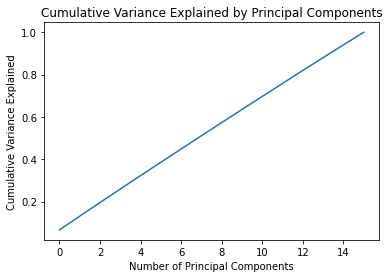

In [85]:
X_selected = data[['Loan Amount','Funded Amount','Funded Amount Investor','Interest Rate','Home Ownership','Debit to Income','Revolving Balance','Revolving Utilities','Total Received Interest','Total Received Late Fee','Recoveries','Collection Recovery Fee','Last week Pay','Total Collection Amount','Total Current Balance','Total Revolving Credit Limit']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure()
plt.plot(cumsum)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')

In [86]:
dim_85 = np.argmax(cumsum >= 0.85) + 1
print(f"Number of principal components needed to retain 85% of the variance is equal to : {dim_85}")

Number of principal components needed to retain 85% of the variance is equal to : 14


In [89]:
n_components = 14
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=X_pca, columns=columns)

In [90]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,1.217485,-0.716925,0.449640,-0.151850,-0.666649,0.065887,0.753442,0.628887,0.608827,0.634334,1.333394,-1.790004,-0.492216,2.778724
1,-0.644174,1.537638,-0.780905,-0.609681,0.349544,0.335738,-1.060002,0.423755,0.325522,-0.121058,0.752294,-0.378662,0.643139,-0.140771
2,0.703228,-0.309142,1.089392,1.281476,0.574786,0.788944,0.050587,-2.459003,-0.105221,0.328554,-2.185600,0.503621,1.700247,-1.157499
3,1.907791,-0.806633,-0.354122,-0.837260,-0.560470,0.002590,-0.758193,0.379258,0.260457,-0.322448,0.013636,1.152965,0.913101,-0.293917
4,1.834413,0.388405,-1.688819,-0.298876,2.092965,3.105352,0.724237,-0.755585,-0.515396,0.035637,-1.837818,-1.466457,0.653027,-0.722540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,-0.465155,-0.458912,-0.581827,-0.155022,1.121381,0.348880,-0.300330,0.448974,-0.503691,-0.731747,-0.182873,-0.327090,-0.429444,0.246428
67459,0.234607,1.126799,0.557297,-1.052843,-0.391149,-0.319979,0.249932,0.278711,0.391428,0.197874,-1.763822,0.933838,-0.199909,0.487341
67460,1.246487,1.994386,-0.732393,0.703407,-1.127542,-0.413023,0.728948,-0.533942,0.760444,-0.675466,1.438705,-0.343307,0.202091,-2.110517
67461,0.608371,1.039065,-0.005966,0.657289,-0.323510,0.201531,-0.890360,0.194096,-2.268633,-0.567114,0.457047,0.124605,0.686213,0.443009


# FEATURE SELECTION using Autoencoders

In [50]:
data.head(5)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,2,16,11.135007,1,13,0,176346.62670,0,16.284758,1,0,13,0,24246,74.932551,7,1,2929.646315,0.102055,2.498291,0.793724,0,0,49,31,311301,6619,0
1,3609,11940,12191.99692,2,4,12.237563,2,17,2,39833.92100,1,15.412409,0,0,12,0,812,78.297186,13,0,772.769385,0.036181,2.377215,0.974821,0,0,109,53,182610,20885,0
2,28276,9311,21603.22455,2,11,12.545884,5,18,0,91506.69105,1,28.137619,0,0,14,0,1843,2.073040,20,1,863.324396,18.778660,4.316277,1.020075,0,0,66,34,89801,26155,0
3,11170,6954,17877.15585,2,15,16.731201,2,12,0,108286.57590,1,18.043730,1,0,7,0,13819,67.467951,12,1,288.173196,0.044131,0.107020,0.749971,0,0,39,40,9189,60214,0
4,16890,13226,13539.92667,2,32,15.008300,2,18,0,44234.82545,1,17.209886,1,3,13,1,1544,85.250761,22,1,129.239553,19.306646,1294.818751,0.368953,0,0,18,430,126029,22579,0


In [56]:
X_selected = data[['Loan Amount','Funded Amount','Funded Amount Investor','Interest Rate','Home Ownership','Debit to Income','Revolving Balance','Revolving Utilities','Total Received Interest','Total Received Late Fee','Recoveries','Collection Recovery Fee','Last week Pay','Total Collection Amount','Total Current Balance','Total Revolving Credit Limit']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

input_dim = X_selected.shape[1] 
encoding_dim = 12  

autoencoder = Sequential()

# Encoder layers
autoencoder.add(Dense(14, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder layers
autoencoder.add(Dense(14, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.compile(optimizer='adam', loss='mean_squared_error',  metrics=['accuracy'])

# Train the autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True)

# Extract features using the encoder part of the autoencoder
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)
X_encoded = encoder.predict(X_scaled)


# Create a DataFrame with the encoded features
columns = [f'AEC{i+1}' for i in range(encoding_dim)]
df_AEC = pd.DataFrame(data=X_encoded, columns=columns)


Epoch 1/50
2109/2109 [==============================] - 1s 640us/step - loss: 0.8031 - accuracy: 0.4832
Epoch 2/50
2109/2109 [==============================] - 1s 647us/step - loss: 0.6765 - accuracy: 0.7120
Epoch 3/50
2109/2109 [==============================] - 1s 612us/step - loss: 0.6400 - accuracy: 0.8198
Epoch 4/50
2109/2109 [==============================] - 1s 618us/step - loss: 0.6291 - accuracy: 0.8457
Epoch 5/50
2109/2109 [==============================] - 1s 611us/step - loss: 0.6242 - accuracy: 0.8500
Epoch 6/50
2109/2109 [==============================] - 1s 637us/step - loss: 0.6179 - accuracy: 0.8538
Epoch 7/50
2109/2109 [==============================] - 1s 615us/step - loss: 0.6149 - accuracy: 0.8640
Epoch 8/50
2109/2109 [==============================] - 1s 620us/step - loss: 0.6139 - accuracy: 0.8682
Epoch 9/50
2109/2109 [==============================] - 1s 632us/step - loss: 0.6129 - accuracy: 0.8855
Epoch 10/50
2109/2109 [==============================] - 1s 623u

In [57]:
df_AEC

,AEC1,AEC2,AEC3,AEC4,AEC5,AEC6,AEC7,AEC8,AEC9,AEC10,AEC11,AEC12
0,6.305052,1.639097,3.523685,7.221577,4.962783,8.313293,6.998860,5.655102,4.716534,6.224076,2.593864,6.731921
1,5.229443,5.117070,12.025578,10.592669,8.198471,9.666074,5.963077,7.140620,5.416145,6.788871,5.595232,9.910195
2,8.201051,12.602710,4.812628,16.358582,11.503098,9.255594,4.690664,5.146551,8.830983,10.968912,6.852104,5.344409
3,6.671525,5.816823,11.824673,14.981524,11.716747,11.523303,8.288621,8.092830,7.968732,14.372259,9.700334,10.083514
4,4.314605,6.546058,8.204471,16.680166,9.429019,2.608149,0.831835,4.053218,11.030521,4.447101,4.707291,4.443791
...,...,...,...,...,...,...,...,...,...,...,...,...
67458,5.088818,8.182593,16.215813,12.316104,7.515731,6.175106,6.491628,8.884624,9.611449,7.550685,6.746069,11.130246
67459,9.609064,7.951438,10.788027,10.625193,9.387652,11.240375,7.796050,6.947622,6.891948,8.686475,7.837365,7.202361
67460,2.461437,3.768137,6.338051,9.554486,5.060689,7.642365,5.172142,3.388984,0.165786,6.949008,6.385691,1.265467
67461,5.330389,7.290812,10.232900,12.269310,8.793583,12.347508,6.379403,11.530462,6.466750,8.623480,8.910252,10.437137


# FEATURE SELECTION using Contrastive Learning

In [108]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

class SiameseNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(SiameseNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 28),
            nn.ReLU(),
            nn.Linear(28, 26),
            nn.ReLU(),
            nn.Linear(26, output_size)
        )

    def forward(self, x1, x2):
        out1 = self.fc(x1)
        out2 = self.fc(x2)
        return out1, out2


class ContrastiveLoss(nn.Module):
    def __init__(self, margin):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = nn.functional.pairwise_distance(output1, output2)
        loss_contrastive = torch.mean((1 - label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive

siamese_network = SiameseNetwork(input_size=30, output_size=24)
contrastive_loss = ContrastiveLoss(margin=1.0)
optimizer = optim.Adam(siamese_network.parameters(), lr=0.001)

class SiameseDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, index):
        x1 = self.X[index]
        label = self.y[index]
        x2 = self.X[torch.randint(len(self.X), (1,)).item()]
        return x1, x2, torch.tensor(label, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

batch_size = 64
train_dataset = SiameseDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

num_epochs = 1
for epoch in range(num_epochs):
    for x1, x2, label in train_loader:
        optimizer.zero_grad()
        output1, output2 = siamese_network(x1, x2)
        loss = contrastive_loss(output1, output2, label)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

siamese_network.eval()
with torch.no_grad():
    num_samples = len(X_tensor)
    indices = torch.randint(num_samples, (num_samples,))
    x1_eval = X_tensor
    x2_eval = X_tensor[indices]

    all_outputs, _ = siamese_network(x1_eval, x2_eval)

    
columns = [f'CL{i+1}' for i in range(24)]
df_CL = pd.DataFrame(data=all_outputs, columns=columns)

Epoch [1/1], Loss: 0.008568366058170795


# Treating the minority class as an anomaly and using anomaly detection techniques for classification

In [109]:
# For CL

clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(df_CL)

y_pred = clf.predict(df_CL)

y_pred_binary = np.where(y_pred == 1, 0, 1)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_CL, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")


Confusion Matrix:
[[56113  5109]
 [ 5566   675]]
Calinski-Harabasz Index: 1083.233768851428
Homogeneity: 0.000993640215347779
Completeness: 0.0010471236363055248
V-Measure: 0.001019681091108557


In [91]:
# For PCA

clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(df_pca)

y_pred = clf.predict(df_pca)

y_pred_binary = np.where(y_pred == 1, 0, 1)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_pca, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[57200  4022]
 [ 5802   439]]
Calinski-Harabasz Index: 3036.519722390054
Homogeneity: 4.677190128324451e-05
Completeness: 5.922046641328658e-05
V-Measure: 5.226515586405923e-05


In [70]:
# For Auto-encoder

clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(df_AEC)

y_pred = clf.predict(df_AEC)

y_pred_binary = np.where(y_pred == 1, 0, 1)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_AEC, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[56045  5177]
 [ 5660   581]]
Calinski-Harabasz Index: 1379.0131474926584
Homogeneity: 0.0001239961652582037
Completeness: 0.000131079469950569
V-Measure: 0.0001274394679416994


In [71]:
# For without feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = IsolationForest(contamination='auto', random_state=42)
clf.fit(X_scaled)

y_pred = clf.predict(X_scaled)

y_pred_binary = np.where(y_pred == 1, 0, 1)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(X_scaled, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[58801  2421]
 [ 5946   295]]
Calinski-Harabasz Index: 669.1035182133136
Homogeneity: 0.00020053931932830773
Completeness: 0.00036634971667653574
V-Measure: 0.0002591954268023739


# Using K-means

In [110]:
# For CL
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(df_CL)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_CL, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[32730 28492]
 [ 3245  2996]]
Calinski-Harabasz Index: 11207.56793038879
Homogeneity: 0.00011749899595832377
Completeness: 5.243012733802334e-05
V-Measure: 7.250655097468198e-05


In [92]:
# For PCA
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(df_pca)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_pca, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[ 2492 58730]
 [  291  5950]]
Calinski-Harabasz Index: 4453.153865839359
Homogeneity: 0.00011652864824345449
Completeness: 0.0002089925595022389
V-Measure: 0.0001496284719535778


In [74]:
# For Auto-encoder
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(df_AEC)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_AEC, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[22673 38549]
 [ 2294  3947]]
Calinski-Harabasz Index: 24761.90558476327
Homogeneity: 4.489600940202224e-06
Completeness: 2.100414979489638e-06
V-Measure: 2.8619126817443093e-06


In [75]:
# For without feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(X_scaled, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[28150 33072]
 [ 3014  3227]]
Calinski-Harabasz Index: 2387.5794218111528
Homogeneity: 0.00029265876441557007
Completeness: 0.00013071932444651111
V-Measure: 0.00018071863889118842


# For GMM

In [111]:
# For CL
n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
y_pred = gmm.fit_predict(df_CL)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_CL, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[20712 40510]
 [ 2126  4115]]
Calinski-Harabasz Index: 968.592643261576
Homogeneity: 3.3284074844874876e-06
Completeness: 1.6032586917636347e-06
V-Measure: 2.1640954754533544e-06


In [93]:
# For PCA
n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
y_pred = gmm.fit_predict(df_pca)

# Evaluate t he model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_pca, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[ 9488 51734]
 [ 1048  5193]]
Calinski-Harabasz Index: 2717.2942411786757
Homogeneity: 0.00017006408068554726
Completeness: 0.0001210139948962277
V-Measure: 0.00014140627906089566


In [78]:
# For Auto-encoder
n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
y_pred = gmm.fit_predict(df_AEC)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_AEC, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[22965 38257]
 [ 2347  3894]]
Calinski-Harabasz Index: 2544.1150591705123
Homogeneity: 5.254196582411261e-07
Completeness: 2.4482269605480724e-07
V-Measure: 3.3401086443336617e-07


In [79]:
# For without feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
y_pred = gmm.fit_predict(X_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(X_scaled, y_pred)
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[21693 39529]
 [ 1990  4251]]
Calinski-Harabasz Index: 2206.0936844751977
Homogeneity: 0.0007623081663905601
Completeness: 0.00036263931300222824
V-Measure: 0.0004914770063844693


# For OneClassSVM

In [112]:
# For CL
clf = OneClassSVM(nu=0.005)
y_pred = clf.fit_predict(df_CL)

y_pred_binary = np.where(y_pred == 1, 0, 1)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_CL, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[60932   290]
 [ 6194    47]]
Calinski-Harabasz Index: 122.3639219138809
Homogeneity: 0.00018791017872129211
Completeness: 0.0018418436572292818
V-Measure: 0.0003410277292512632


In [94]:
# For PCA
clf = OneClassSVM(nu=0.005)
y_pred = clf.fit_predict(df_pca)

y_pred_binary = np.where(y_pred == 1, 0, 1)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_pca, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[60855   367]
 [ 6203    38]]
Calinski-Harabasz Index: 444.62904619062215
Homogeneity: 2.0157119867522645e-07
Completeness: 1.6935875540713559e-06
V-Measure: 3.6026372233023864e-07


In [82]:
# For Auto-encoder
clf = OneClassSVM(nu=0.005)
y_pred = clf.fit_predict(df_AEC)

y_pred_binary = np.where(y_pred == 1, 0, 1)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(df_AEC, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[60919   303]
 [ 6202    39]]
Calinski-Harabasz Index: 136.44950838256972
Homogeneity: 4.277190987900597e-05
Completeness: 0.00041408018641985237
V-Measure: 7.7534942094896e-05


In [83]:
# For without feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2
clf = OneClassSVM(nu=0.005)
y_pred = clf.fit_predict(X_scaled)

y_pred_binary = np.where(y_pred == 1, 0, 1)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Print evaluation metrics
calinski_harabasz_index = calinski_harabasz_score(X_scaled, y_pred_binary)
homogeneity = homogeneity_score(y, y_pred_binary)
completeness = completeness_score(y, y_pred_binary)
v_measure = v_measure_score(y, y_pred_binary)


print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-Measure: {v_measure}")

Confusion Matrix:
[[60803   419]
 [ 6193    48]]
Calinski-Harabasz Index: 284.7228383185968
Homogeneity: 1.3768423206677255e-05
Completeness: 0.00010272485469554673
V-Measure: 2.4282246989046446e-05


In [84]:
# GMM, Kmeans, IsolationForest, OneClassSVM

In [ ]:
# reduce false positives.